In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #The k-means algorithm

In [2]:
movie_file = pd.read_csv('movies.csv')
ratings_file = pd.read_csv('ratings.csv')
df = pd.merge(movie_file, ratings_file)

ratings = pd.pivot_table(df, index='userId', columns='title', values='rating')
ratings.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ratings = ratings.reindex(ratings.count().sort_values(ascending=False).index, axis=1)
ratings.head(3)

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Wedding, The (Kivenpyörittäjän kylä) (1995)","Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ratings_full = ratings.fillna(0) #fill the NaN with the mean of each column
ratings_full.head(3)

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Wedding, The (Kivenpyörittäjän kylä) (1995)","Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df["rating"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [6]:
#Pick a suitable number of clusters (somewhere between 4 and 10 will work)
km = KMeans(n_clusters=5) #create a new k-means model with 3 clusters
X = ratings_full
km = km.fit(X) #calculate the cluster centers
ratings['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
ratings.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014),cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,1.0,5.0,1.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,NaN,3.0,5.0,NaN,NaN,NaN,NaN,4.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


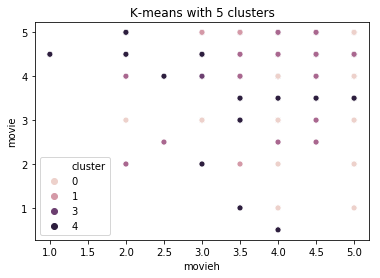

In [7]:
sns. scatterplot(x='Forrest Gump (1994)', y='Pulp Fiction (1994)', 
                 hue= "cluster", data = ratings)
plt.title('K-means with 5 clusters')
plt.xlabel('movieh')
plt.ylabel('movie')
plt.show()

In [8]:
#Print the number of users per cluster (do you remember the relevant Pandas function?).
ratings["cluster"].value_counts()

4    407
0    104
2     88
1      9
3      2
Name: cluster, dtype: int64

In [10]:
#Calculate the mean rating by user cluster using the Pandas pivot_table function.
mean = ratings.groupby(['cluster']).mean()
#Pandas will sort alphabetically after making the pivot table, so you will need to reorder your pivot table
#mean.reindex(ratings.count().sort_values(ascending=False).index, axis=1)
#Replace my_pivot with the name of your pivot table
mean.head(5)

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Wedding, The (Kivenpyörittäjän kylä) (1995)","Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014)
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.284810,4.400000,3.882353,4.310606,4.200000,4.730769,3.924658,4.288462,3.935484,4.434783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.055556,4.000000,4.555556,4.333333,4.222222,4.500000,3.722222,4.000000,4.312500,4.250000,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.0
2,4.152439,4.463768,4.418919,4.198529,4.232143,4.234177,3.690141,3.956140,3.970149,4.312500,...,3.0,NaN,5.0,2.5,3.5,4.5,NaN,NaN,3.5,NaN
3,4.000000,5.000000,4.500000,4.250000,4.750000,4.500000,4.250000,4.000000,4.500000,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.117834,4.441718,4.244526,4.055970,4.165730,4.165541,3.638554,3.867021,3.952941,4.086364,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


Examine the mean ratings of the top rated movies by user cluster. 